In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import discopy.util as util
# import discopy.plot as plot
# import discopy.geom as geom
from pathlib import Path

In [2]:
path = '/gpfs/hsu/BH_disco_runs/cb_circular_1000_orbits/report.dat'
dat = np.loadtxt(path)

In [3]:
dat[:,0]

array([0.00000000e+00, 6.51098102e-02, 1.26964130e-01, ...,
       6.28195726e+02, 6.28257581e+02, 6.28318531e+02])

In [4]:
t = dat[:,0]
mass = dat[:,1]
energy = dat[:,2]
radial_momentum = dat[:,3]
angular_momentum = dat[:,4]
vertical_momentum = dat[:,5]
passive_scalar = dat[:,6]
M1 = dat[:,7]
M2 = dat[:,8]
r1 = dat[:,9]
r2 = dat[:,10]
phi1 = dat[:,11]
phi2 = dat[:,12]
dM1 = dat[:,13]
dM2 = dat[:,14]
dJz_grv1 = dat[:,15]
dJz_grv2 = dat[:,16]
dJz_snk1 = dat[:,17]
dJz_snk2 = dat[:,18]


In [5]:
t[1] - t[0], t[10] - t[9], t[2] - t[1], t[80] - t[79]


(0.06510981021888627,
 0.06510981021888629,
 0.06185431970794193,
 0.06510981021888096)

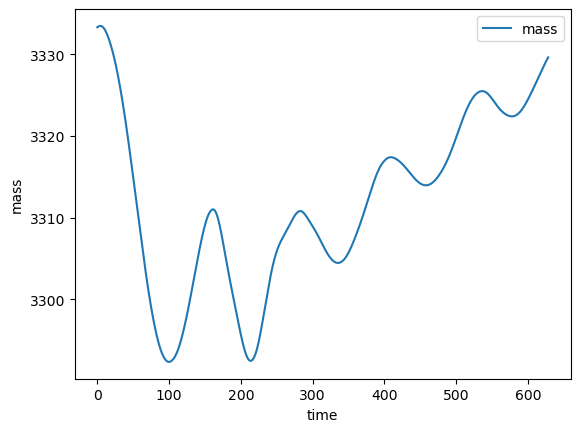

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, mass, label='mass')
# ax.plot(t, dmass, label='dmass')
# ax.set_ylim(0, 0.5)
ax.set_ylabel('mass')
ax.set_xlabel('time')
fig.savefig('mass')
plt.legend()
plt.show()
# plt.close(fig) #delete figure from memory